In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [11]:
df = pd.read_csv('AWS_Honeypot_marx-geo.csv')

In [12]:
df.head()

,datetime,host,src,proto,type,spt,dpt,srcstr,cc,country,locale,localeabbr,postalcode,latitude,longitude,Unnamed: 15
0,3/3/13 21:53,groucho-oregon,1032051418,TCP,NaN,6000.0,1433.0,61.131.218.218,CN,China,Jiangxi Sheng,36,NaN,28.5500,115.9333,NaN
1,3/3/13 21:57,groucho-oregon,1347834426,UDP,NaN,5270.0,5060.0,80.86.82.58,DE,Germany,NaN,NaN,NaN,51.0000,9.0000,NaN
2,3/3/13 21:58,groucho-oregon,2947856490,TCP,NaN,2489.0,1080.0,175.180.184.106,TW,Taiwan,Taipei,NaN,NaN,25.0392,121.5250,NaN
3,3/3/13 21:58,groucho-us-east,841842716,UDP,NaN,43235.0,1900.0,50.45.128.28,US,United States,Oregon,OR,97124,45.5848,-122.9117,NaN
4,3/3/13 21:58,groucho-singapore,3587648279,TCP,NaN,56577.0,80.0,213.215.43.23,FR,France,NaN,NaN,NaN,48.8600,2.3500,NaN


In [13]:
df.isna().sum()

datetime            0
host                0
src                 0
proto               0
type           406770
spt             44811
dpt             44811
srcstr              0
cc               3596
country          3634
locale         109469
localeabbr     119876
postalcode     365103
latitude         3469
longitude        3428
Unnamed: 15    451498
dtype: int64

In [14]:
# number of rows in the dataset
df.size

7225296

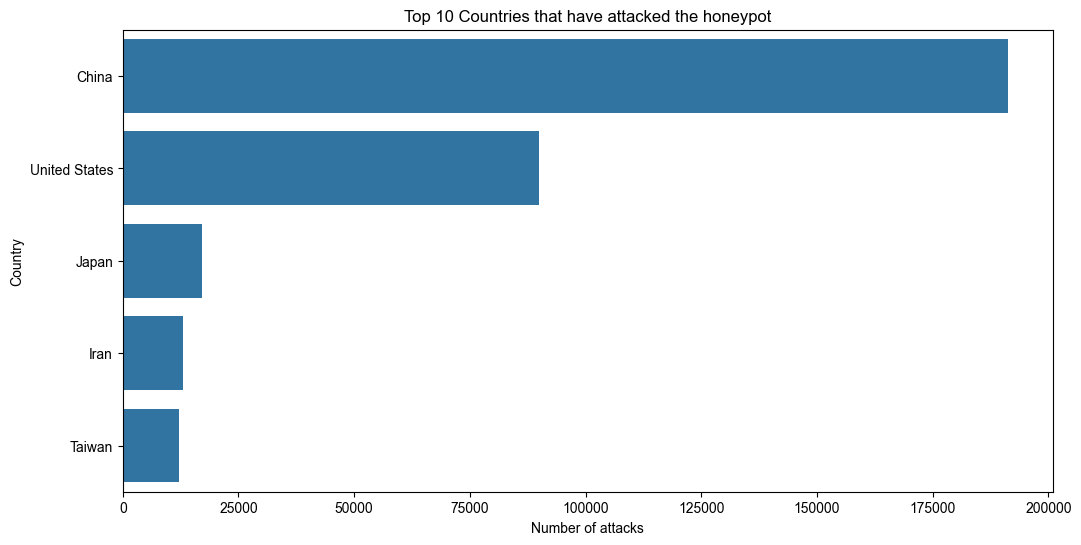

In [15]:
# take the top 10 countries

df.country.value_counts().head(10)

# get the columns of the top 10 countries
top_countries = df.country.value_counts().head(5).index
top_ten_df = df[df.country.isin(top_countries)].country
# plot the top 10 countries sorted from largest to smallest
plt.figure(figsize=(12, 6))
sns.countplot(y=top_ten_df, order=top_ten_df.value_counts().index)

# set title and labels
plt.title('Top 10 Countries that have attacked the honeypot')
plt.xlabel('Number of attacks')
plt.ylabel('Country')

sns.set_style('darkgrid')

C:\Users\salma\AppData\Local\Temp\ipykernel_17160\344418679.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['day'] = pd.to_datetime(df.datetime).dt.day_name()


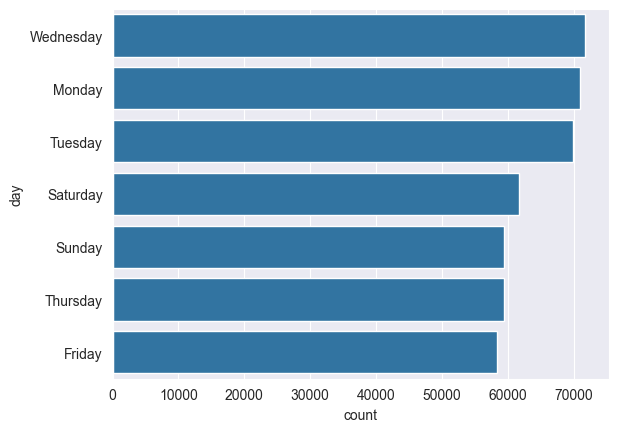

In [16]:
# feature engineer the time column into day of the week

df['day'] = pd.to_datetime(df.datetime).dt.day_name()


# plot the day of the week that the attacks happened overall
sns.countplot(y=df.day, order=df.day.value_counts().index)
sns.set_style('darkgrid')

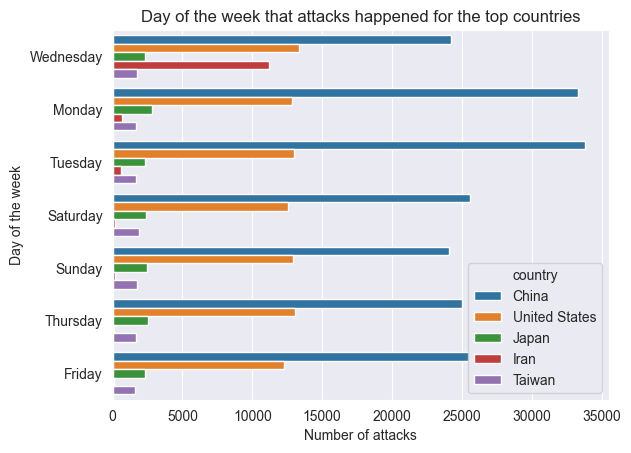

In [17]:
# For specific countries are there days that they are more likely to attack the honeypot?
# plot the day of the week that the attacks happened for the top countries

# only top countries
sns.countplot(y=df.day, order=df.day.value_counts().index, hue=df.country, hue_order=top_countries)

# set title and labels
plt.title('Day of the week that attacks happened for the top countries')
plt.xlabel('Number of attacks')
plt.ylabel('Day of the week')

plt.style.use('ggplot')
sns.set_style('darkgrid') 

China attacks more on monday and tuesday. Iran attacks more on Wednesday some on monday and tuesday and almost never on other days. The United States attacks consistently on all days same with taiwan.

# What times are the attacks happening

C:\Users\salma\AppData\Local\Temp\ipykernel_17160\1641060994.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['hour'] = pd.to_datetime(df.datetime).dt.hour


<Axes: xlabel='count', ylabel='time_of_day'>

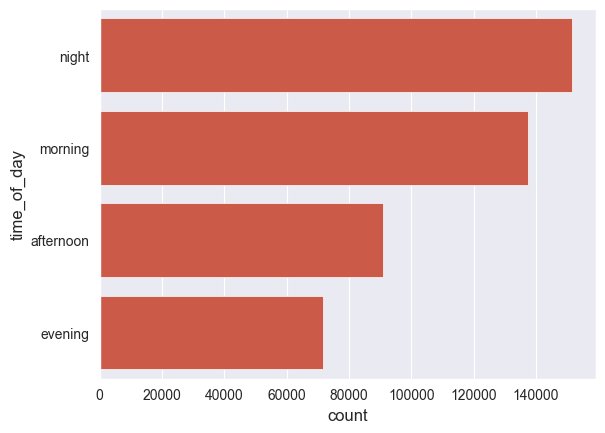

In [18]:
# sort attacks by morning, afternoon, evening and night

df['hour'] = pd.to_datetime(df.datetime).dt.hour

# function to sort the hours into morning, afternoon, evening and night

def sort_hours(hour):
    if hour >= 5 and hour < 12:
        return 'morning'
    elif hour >= 12 and hour < 17:
        return 'afternoon'
    elif hour >= 17 and hour < 21:
        return 'evening'
    else:
        return 'night'
    
df['time_of_day'] = df.hour.apply(sort_hours)

# plot the time of day that the attacks happen

sns.countplot(y=df.time_of_day, order=df.time_of_day.value_counts().index)

Text(0.5, 1.0, 'Time of day that attacks happened for the top countries')

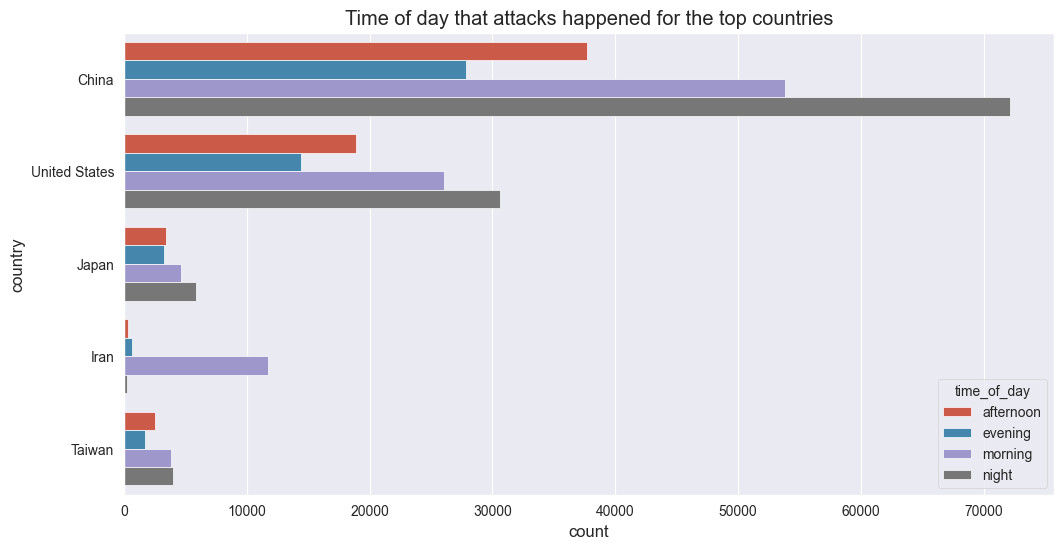

In [20]:
# group the attacks by country and time of day

grouped = df.groupby(['country', 'time_of_day']).size().reset_index(name='count')

# plot the grouped data

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='country', hue='time_of_day', data=grouped, order=top_countries)

# set title and labels
plt.title('Time of day that attacks happened for the top countries')